<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/cha4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4. 가장 뜨는 제주도 핫플레이스는 어디일까?**

**필요한 라이브러리 불러오기**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 코랩을 시작할 때 아래코드를 한 번 돌려줍니다.
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

from selenium import webdriver
from selenium.webdriver.common.by import By

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

!pip install selenium
!apt-get update

# (최초 1회)
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

!pip install selenium
!apt-get update

# (최초 1회)
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve

import time
import pandas as pd
import chromedriver_autoinstaller  # setup chrome options

chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어

chromedriver_autoinstaller.install()  # set the target URL

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,112 kB]
Hit:11 https://ppa.launchpadc

**스타벅스의 지역별 매장 검색 화면에 접속**

In [66]:
driver = webdriver.Chrome(options=chrome_options)
url='https://www.starbucks.co.kr/store/store_map.do?disp=locale'
driver.get(url)

# webdriver의 Chrome()함수를 이용해 크롬 브라우저를 실행하고, browser 변수에 할당.
# driver.get(url)명령어를 통해 해당 url로 이동.

**webdriver로 '서울'버튼 요소를 찾아 클릭**

In [68]:
seoul_btn='#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a'
driver.find_element(By.CSS_SELECTOR,seoul_btn).click()

In [5]:
# '서울' 버튼을 클릭하면, 서울시의 구/군 목록이 나타나고 구/군별 스타벅스 매장을 조회할 수 있는 화면이 나타납니다.
# 이번에는 '전체'버튼을 클릭해 서울시 전체 매장을 조회하겠습니다.

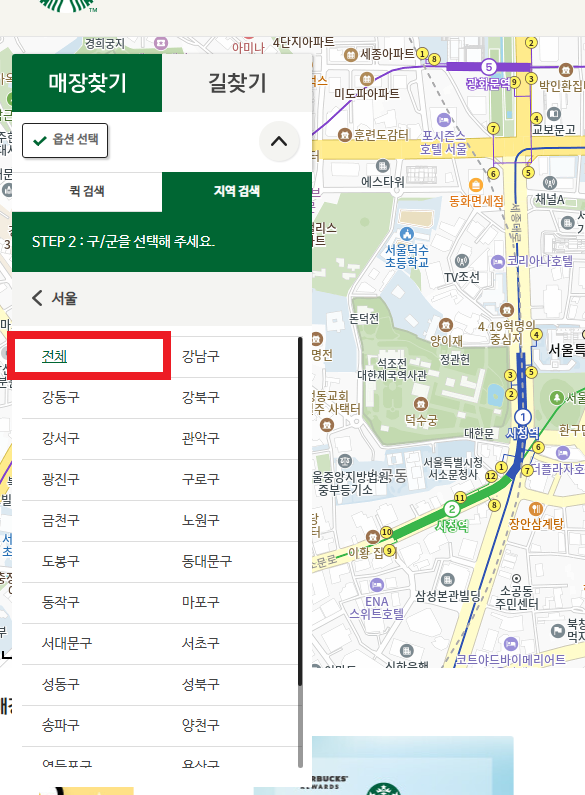

**webdriver '전체'버튼 요소를 찾아 클릭**

In [69]:
all_btn='#mCSB_2_container > ul > li:nth-child(1) > a'
driver.find_element(By.CSS_SELECTOR,all_btn).click()

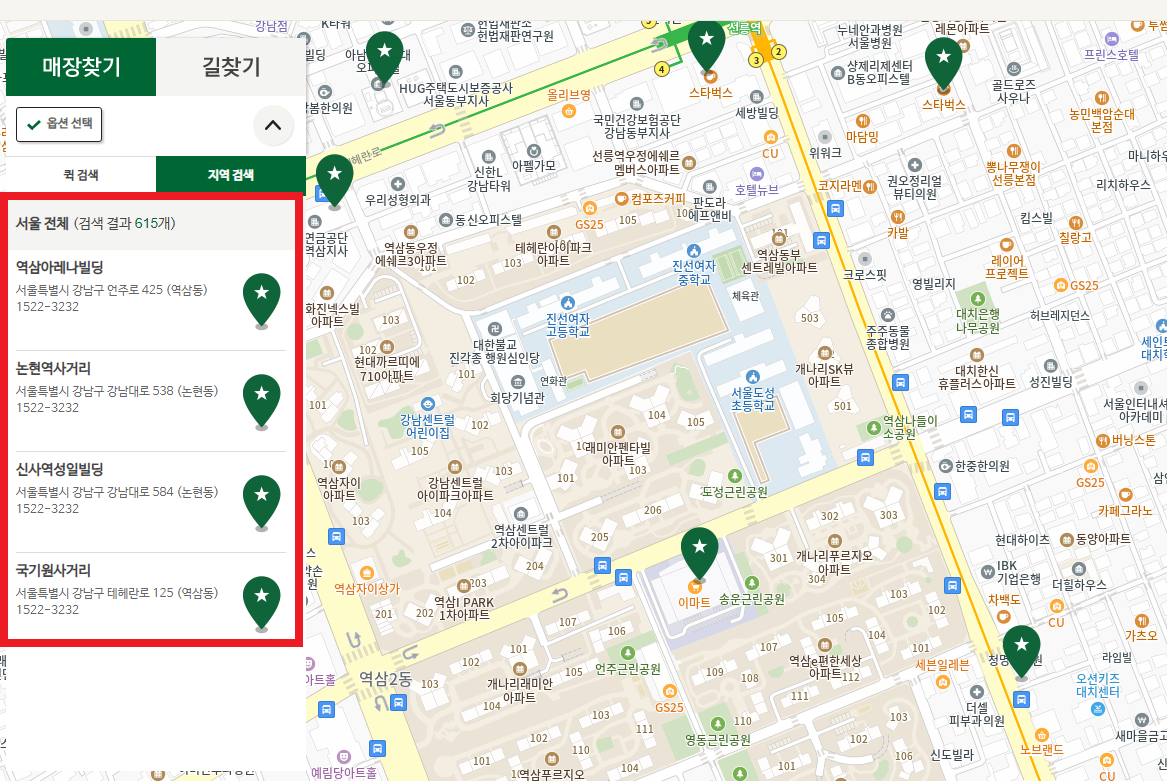

**BeautifulSoup으로 HTML 파서 만들기**

In [72]:
html=driver.page_source
# driver.page_source: 크롬 브라우저의 현재 화면에 나타난 웹페이지의 HTML을 가져올 수 있습니다.

soup=BeautifulSoup(html, 'html.parser')
# html.parser: HTML 문법을 이해하고, 웹 페이지의 정보를 분류하는 역할.
# HTML 문서를 구조적으로 분석하여 프로그래밍적으로 접근하고 조작할 수 있도록 돕는 것.

# driver.page_source: 웹페이지의 HTML 소스를 가져온다.
# BeautifulSoup 라이브러리: 그 HTML 소스를 라이브러리와 'html.parser'를 통해 분석하여 프로그래밍적으로 접근 가능한 구조로 변경.
# 이 과정을 통해, 웹 페이지의 내용을 더 쉽게 추출하고 조작할 수 있게 됩니다.

In [73]:
html

'<html lang="ko"><head>\n\t\t\n\n\n\n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no">\n<meta property="og:type" content="website">\n<meta property="og:title" content="Starbucks">\n<meta property="og:url" content="https://www.starbucks.co.kr/">\n<meta property="og:image" content="https://image.istarbucks.co.kr/common/img/kakaotalk.png">\n<meta property="og:description" content="Starbucks">\n\n<title id="titleJoin">Starbucks Korea</title><script src="https://connect.facebook.net/ko_KR/sdk.js?hash=a01ff6e51bced808ecfdbdc574e2bcfa" async="" crossorigin="anonymous"></script><script id="facebook-jssdk" src="//connect.facebook.net/ko_KR/sdk.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-WC8Q3C59QP&amp;cx=c&amp;_slc=1"></script><script async="" src="//www.google-analytics.c

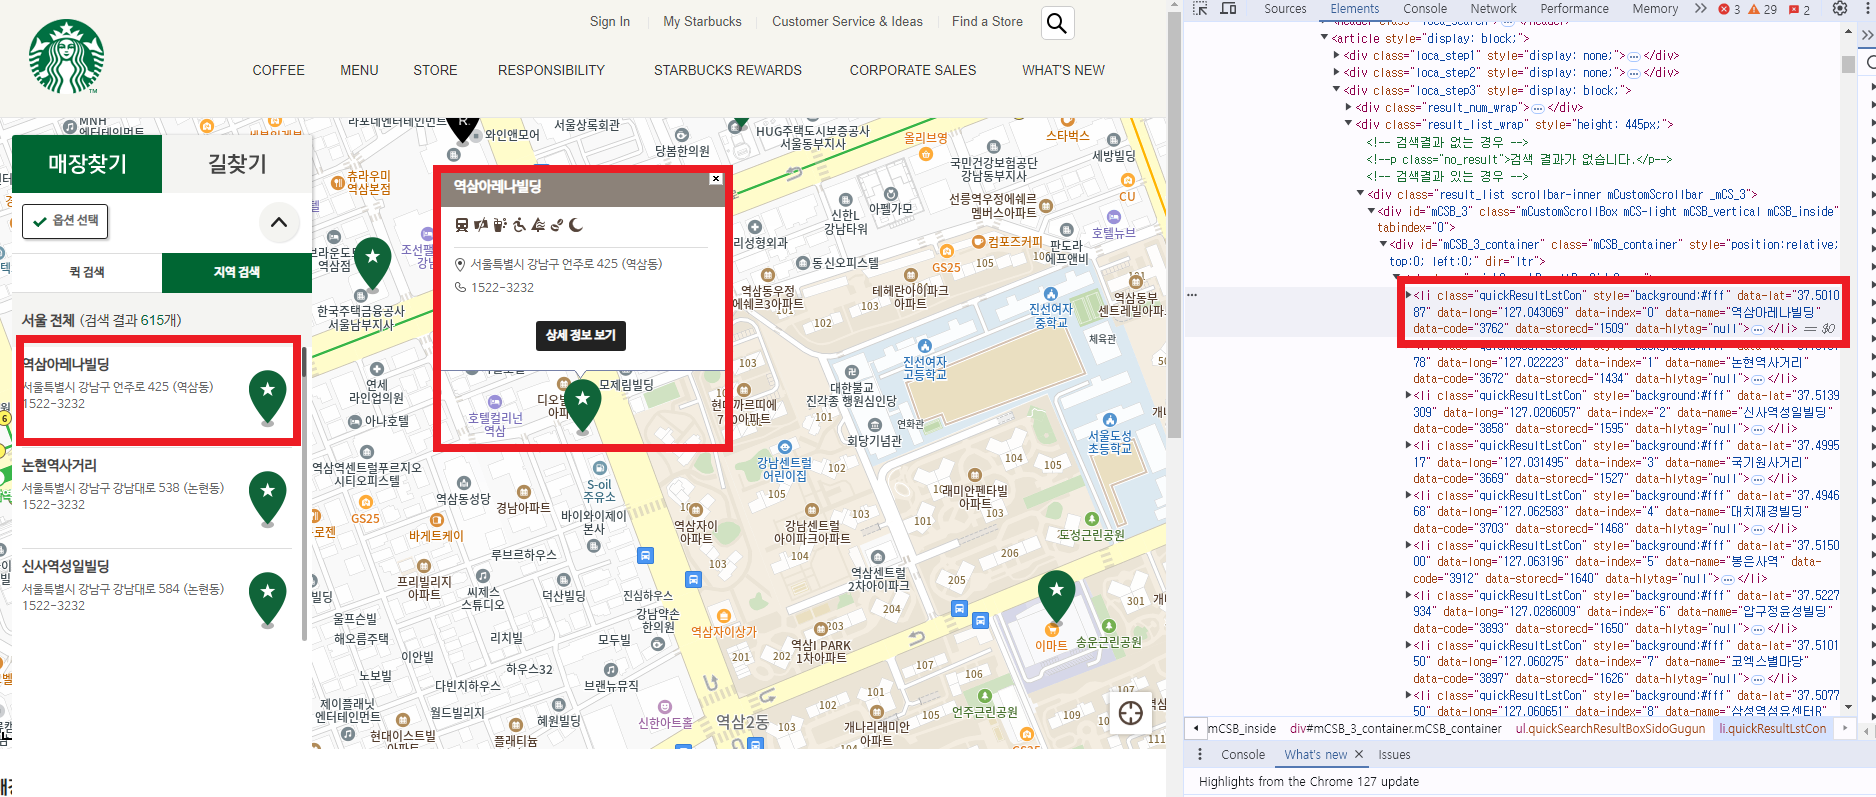

In [74]:
# 매장 리스트에서 1번째 '역삼역 아레나 빌딩'에 해당하는 태그를 확인해보면,
# <li class="quickResultLstCon"... data-name="역삼아레나빌딩"..></li>인 것을 확인할 수 있습니다.

# 스타벅스 매장 목록에서 개별 매장 정보(지점명, 주소 등)는 각각 다르지만, HTML 상에서 동일한 구조의 태그로 표시된다는 사실을 알 수 있습니다.

# <li class="quickResultLstCon" style="background:#fff" data-lat="37.501087" data-long="127.043069" data-index="0" data-name="역삼아레나빌딩" data-code="3762" data-storecd="1509" data-hlytag="null">
# </li>

**select()를 이용해 원하는 HTML 태그를 모두 찾아오기**

In [76]:
starbucks_soup_list=soup.select('li.quickResultLstCon')
print(len(starbucks_soup_list))

# soup.select('li.quickResultLstCon): soup안에서 태그명이 li이면서, class명이 quickResultLstCon인 태그를 모두 찾아 리스트 형태로 저장.

615


**태그 문자열 살펴보기**

In [77]:
starbucks_soup_list[0]

# <li>태그는 class를 비롯한 여러 속성값을 가지고 있는데, 대표적으로 data-lat(37.501087), data-long(127.043069) 속성은 각각 매장의 위도, 경도 데이터를 속성값으로 가지고 있습니다.

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>

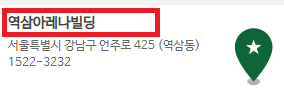

In [14]:
# <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong>
# <strong> 태그는 '역삼아레나빌딩'이라는 텍스트와 이미지를 표시하는 <img>태그를 포함하고 있다.

# 해당 내용에는 img값이 없다. 책의 경우, 역삼아레나 빌딩 옆에 별 그림이 있지만, 현재는 없기 때문에.

In [31]:
 #<p class="result_details">서울특별시 강남구 언주로 425 (역삼동)
 # <br/>1522-3232</p>

 # <p>태그 사이에는 주소와 전화번호가 표시돼 있습니다.

In [78]:
# <i class="pin_general">리저브 매장 2번
# </i></li>

# <i>태그는 class의 속성값으로 pin_general을 가지고 있습니다.
# 아이콘은 스타벅스 매장 타입에 따라 클래스명이 다르게 표시되고, 아이콘 이미지도 달라집니다. 이 값을 통해, 스타벅스 매장 타입을 분류할 수 있습니다.

**스타벅스 매장 정보 샘플 확인**

In [97]:
starbucks_store=starbucks_soup_list[0]
name=starbucks_store.select('strong')[0].text.strip()
print('매장명:',name)

lat=starbucks_store['data-lat'].strip()
print('위도:',lat)

lng=starbucks_store['data-long'].strip()
print('경도:',lng)

store_type=starbucks_store.select('i')[0]['class'][0][4:]
print('매장타입:',store_type)

store_type1=starbucks_store.select('i')[0]['class'][0]
print('매장타입:',store_type1)

address=str(starbucks_store.select('p.result_details')[0]).split('<br/>')[0].split('>')[1]
print('주소:',address)

tel=str(starbucks_store.select('p.result_details')[0]).split('<br/>')[1].split('<')[0]
print('전화번호:',tel)

매장명: 역삼아레나빌딩
위도: 37.501087
경도: 127.043069
매장타입: general
매장타입: pin_general
주소: 서울특별시 강남구 언주로 425 (역삼동)
전화번호: 1522-3232


In [98]:
str(starbucks_store.select('p.result_details')[0]).split('<br/>')[0]

'<p class="result_details">서울특별시 강남구 언주로 425 (역삼동)'

In [99]:
str(starbucks_store.select('p.result_details')[0]).split('<br/>')[0].split('>')

['<p class="result_details"', '서울특별시 강남구 언주로 425 (역삼동)']

In [100]:
str(starbucks_store.select('p.result_details')[0]).split('<br/>')[1]

'1522-3232</p>'

**서울시 스타벅스 매장 목록 데이터 만들기**

In [94]:
starbucks_list=[]
for item in starbucks_soup_list:
  print('item값:',item)
  name=item.select('strong')[0].text.strip();
  lat=item['data-lat'].strip();
  lng=item['data-long'].strip();
  store_type=item.select('i')[0]['class'][0][4:]
  address=str(item.select('p.result_details')[0]).split('<br/>')[0].split('>')[1]
  tel=str(item.select('p.result_details')[0]).split('<br/>')[1].split('<')[0]

  starbucks_list.append([name, lat, lng, store_type, address, tel])

item값: <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>
item값: <li class="quickResultLstCon" data-code="3672" data-hlytag="null" data-index="1" data-lat="37.510178" data-long="127.022223" data-name="논현역사거리" data-storecd="1434" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="논현역사거리" data-store="1434" data-yn="N">논현역사거리  </strong> <p class="result_details">서울특별시 강남구 강남대로 538 (논현동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>
item값: <li class="quickResultLstCon" data-code="3858" data-hlytag="null" data-index="2" data-lat="37.5139309" data-long="127.0206057" data-name="신사역성일빌딩" data-storecd="

In [101]:
starbucks_list

[['역삼아레나빌딩',
  '37.501087',
  '127.043069',
  'general',
  '서울특별시 강남구 언주로 425 (역삼동)',
  '1522-3232'],
 ['논현역사거리',
  '37.510178',
  '127.022223',
  'general',
  '서울특별시 강남구 강남대로 538 (논현동)',
  '1522-3232'],
 ['신사역성일빌딩',
  '37.5139309',
  '127.0206057',
  'general',
  '서울특별시 강남구 강남대로 584 (논현동)',
  '1522-3232'],
 ['국기원사거리',
  '37.499517',
  '127.031495',
  'general',
  '서울특별시 강남구 테헤란로 125 (역삼동)',
  '1522-3232'],
 ['대치재경빌딩',
  '37.494668',
  '127.062583',
  'general',
  '서울특별시 강남구 남부순환로 2947 (대치동)',
  '1522-3232'],
 ['봉은사역',
  '37.515000',
  '127.063196',
  'general',
  '서울특별시 강남구 봉은사로 619 (삼성동)',
  '1522-3232'],
 ['압구정윤성빌딩',
  '37.5227934',
  '127.0286009',
  'general',
  '서울특별시 강남구 논현로 834 (신사동)',
  '1522-3232'],
 ['코엑스별마당',
  '37.510150',
  '127.060275',
  'general',
  '서울특별시 강남구 영동대로 513 (삼성동)',
  '1522-3232'],
 ['삼성역섬유센터R',
  '37.507750',
  '127.060651',
  'reserve',
  '서울특별시 강남구 테헤란로 518 (대치동)',
  '1522-3232'],
 ['압구정R',
  '37.5273669',
  '127.033061',
  'reserve',
  '서울특별시 강남구 언주로 861

**pandas의 데이터 프레임 생성**

In [103]:
columns=['매장명','위도','경도','매장타입','주소','전화번호']
seoul_starbucks_df=pd.DataFrame(starbucks_list, columns=columns)
# columns 변수에 칼럼명을 순서대로 입력.

seoul_starbucks_df.head()

,매장명,위도,경도,매장타입,주소,전화번호
0,역삼아레나빌딩,37.501087,127.043069,general,서울특별시 강남구 언주로 425 (역삼동),1522-3232
1,논현역사거리,37.510178,127.022223,general,서울특별시 강남구 강남대로 538 (논현동),1522-3232
2,신사역성일빌딩,37.5139309,127.0206057,general,서울특별시 강남구 강남대로 584 (논현동),1522-3232
3,국기원사거리,37.499517,127.031495,general,서울특별시 강남구 테헤란로 125 (역삼동),1522-3232
4,대치재경빌딩,37.494668,127.062583,general,서울특별시 강남구 남부순환로 2947 (대치동),1522-3232


**데이터프레임의 요약 정보 확인**

In [104]:
seoul_starbucks_df.info()
# 데이터프레임에 615개에 달하는 매장 정보가 저장돼 있고 모든 칼럼에 null인 값이 없습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장명     615 non-null    object
 1   위도      615 non-null    object
 2   경도      615 non-null    object
 3   매장타입    615 non-null    object
 4   주소      615 non-null    object
 5   전화번호    615 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


**엑셀로 저장**

In [105]:
seoul_starbucks_df.to_excel('seoul_starbucks_list.xlsx',index=False)

**서울열린데이터 광장의 OPEN API를 활용한 공공데이터 수집**

In [ ]:
# 서울 열린데이터 광장: https://data.seoul.go.kr/

# 시민들에게 서울 행정 구역 내의 다양한 공공 데이터를 제공하고 있습니다.
# 사용자들은 해당 사이트에서 데이터를 내려받거나 Open API를 통해 획득할 수 있습니다.

In [ ]:
# 서울열린데이터광장의 OPEN API를 사용하려면 사이트에 가입하고 인증키를 발급받아야 합니다.
# 인증키가 없으면 OPEN API를 사용할 수 없습니다.

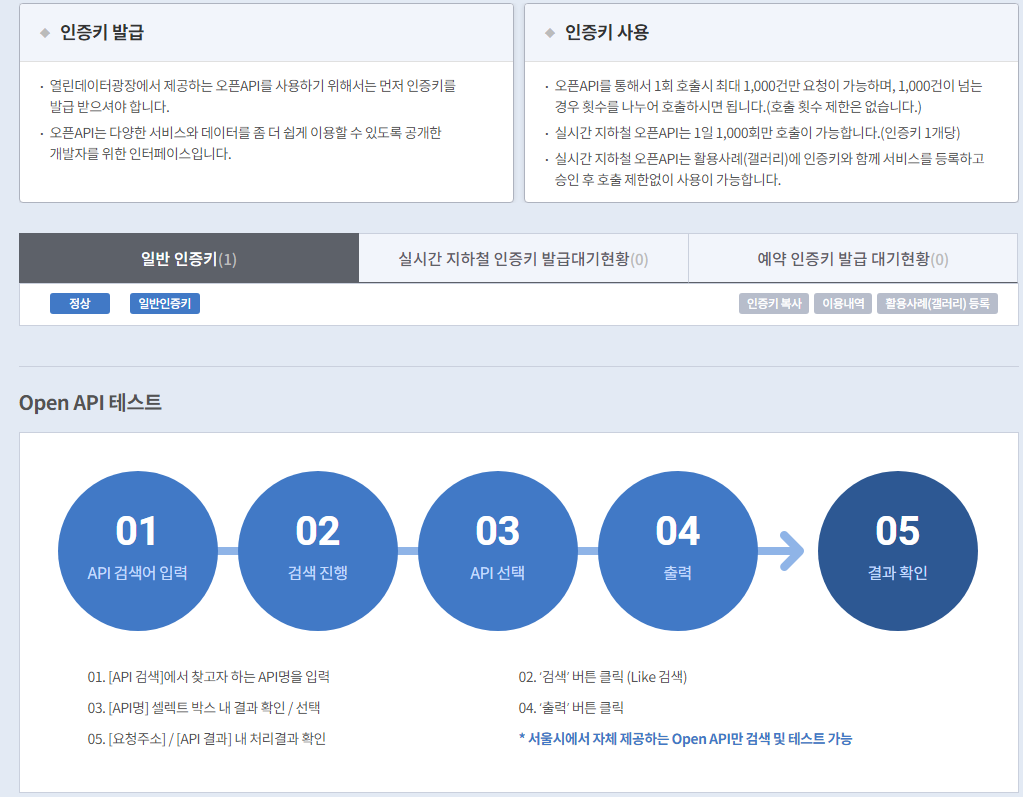

In [ ]:
# 위의 사진처럼 신청이 완료되면, [마이페이지]에서 [인증키 관리]를 클릭하고 인증키를 확인할 수 있습니다.
# 이 인증키는 서울열린데이터광장의 OPEN API를 호출할 때 항상 함께 보내야 하는데, 서울시열린데이터광장에서는 약간의
# 제한을 두고 있습니다.

**서울열린데이터광장 OPEN API 호출하기 실습(서울시 시군구 목록 데이터)**

In [ ]:
# API의 URL형식: http://openapi.seoul.go.kr:8088/{KEY}/{TYPE}/{SERVICE}/{START_INDEX}/{END_INDEX}/{OBJECTID}

In [ ]:
# 요청인자는 필수 값과 선택 값으로 구분됩니다. 만약 API를 호출할 때 필수 값을 전달하지 않으면 에러가 발생하기 때문에
# 필수 값은 반드시 전달해야 합니다.

# {KEY}: 인증키 - 서울열린데이터광장에서 발급된 인증키
# {SERVICE}: 해당 API의 서비스명(SdeTISccoSigw: 서울시 행정구역 시군구 정보에 해당하는 서비스명.)

# ex) 서울시 시군구 데이터의 1번데이터부터 25번 데이터까지 json파일 형식으로 얻고 싶다면
# http://openapi.seoul.go.kr:8088/{인증키}/json/SdeTISccoSigw/1/25/

**라이브러리 임포트**

In [106]:
import requests
import pandas as pd
# OPEN API를 호출하기 위해 requests 라이브러리를 사용합니다.

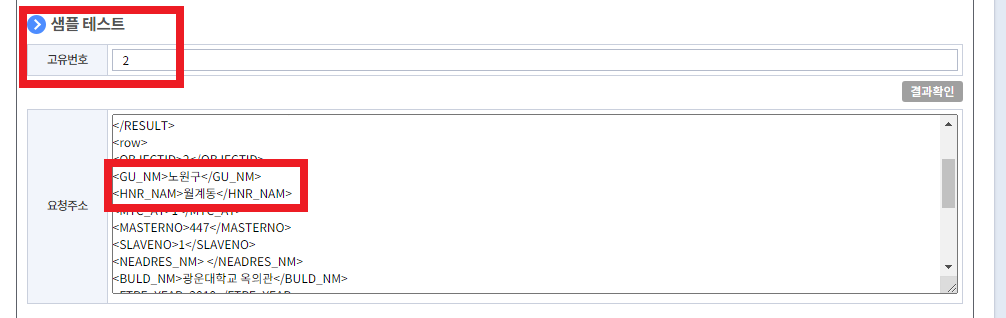

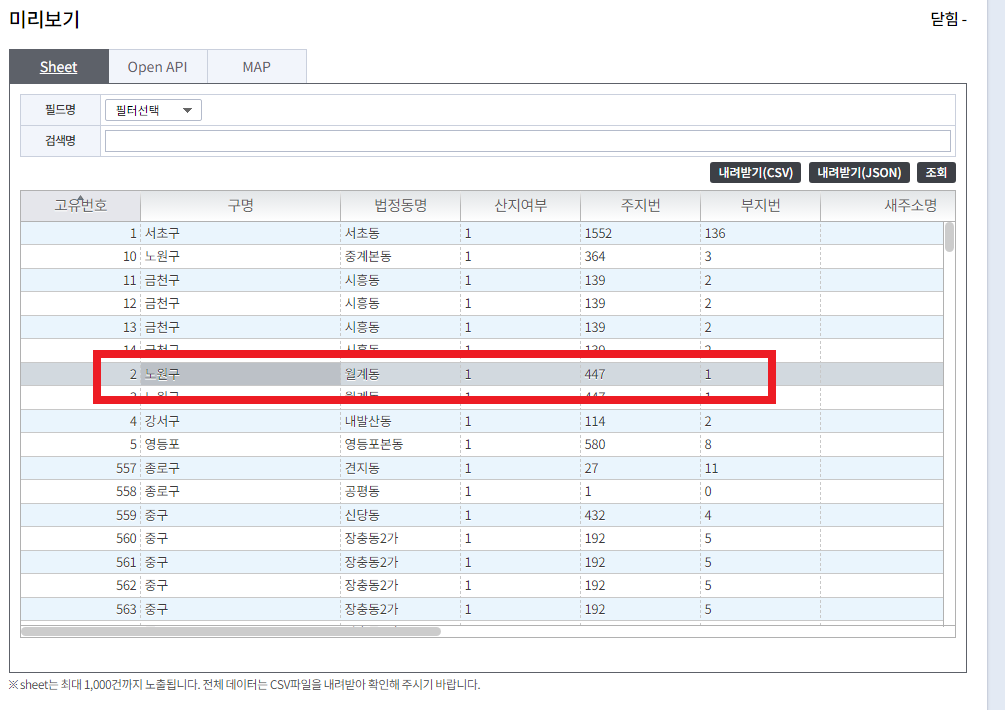

**자주 사용하는 변수를 미리 선언**

In [107]:
# 서울열린데이터광장 API 호출 키
SEOUL_API_AUTH_KEY='********************************'
# 인증키는 OPEN API를 호출할 때마다 사용하므로 변수에 저장해두고 사용.